général<a id="top"></a>
===

chap:
- [Test](#Test)
- [Decorator](#Decorator)
- [Yield](#Yield)
- [POO](#POO)



In [66]:
from IPython.display import Markdown as md


md_link_test = {'name': 'Test auto link', 'value': 'TestAutoLink'}

md(f"""
### {md_link_test.get('name')}<a id="{md_link_test.get('value')}"></a>
Ceci est un test pour générer du markdown avec python et notamment des liens qui s'auto incrémentent ...
""")


### Test auto link<a id="TestAutoLink"></a>
Ceci est un test pour générer du markdown avec python et notamment des liens qui s'auto incrémentent ...


In [68]:
md(f"""
On test pour voir si c'est ok : 
[{md_link_test.get('name')}](#{md_link_test.get('value')})

Il semble que c'est ok, ça fonctionne, mais on dédouble le texte (prèsent une première fois en Python et une seconde fois en markdown). Donc meh... vivement des variables en Markdown pour faire un chapitrage auto !
""")


On test pour voir si c'est ok : 
[Test auto link](#TestAutoLink)

Il semble que c'est ok, ça fonctionne, mais on dédouble le texte (prèsent une première fois en Python et une seconde fois en markdown). Donc meh... vivement des variables en Markdown pour faire un chapitrage auto !


[Back to top](#top)

---

## Test<a id="Test"></a>

```Python
import unittest

addtwo = lambda x: x + 2

class LambdaTest(unittest.TestCase):
    def test_add_two(self):
        self.assertEqual(addtwo(2), 4)

    def test_add_two_point_two(self):
        self.assertEqual(addtwo(2.2), 4.2)

    def test_add_three(self):
        # Should fail
        self.assertEqual(addtwo(3), 5)

if __name__ == '__main__':
    unittest.main(verbosity=2)
```

In [2]:
import doctest

def addtwo(x): 
    """Add 2 to a number.
    >>> addtwo(2)
    4
    >>> addtwo(2.2)
    4.2
    >>> addtwo(3) # Should fail
    6
    """
    return x + 2

if __name__ == '__main__':
    doctest.testmod(verbose=True)

Trying:
    addtwo(2)
Expecting:
    4
ok
Trying:
    addtwo(2.2)
Expecting:
    4.2
ok
Trying:
    addtwo(3) # Should fail
Expecting:
    6
**********************************************************************
File "__main__", line 9, in __main__.addtwo
Failed example:
    addtwo(3) # Should fail
Expected:
    6
Got:
    5
5 items had no tests:
    __main__
    __main__.LambdaTest
    __main__.LambdaTest.test_add_three
    __main__.LambdaTest.test_add_two
    __main__.LambdaTest.test_add_two_point_two
**********************************************************************
1 items had failures:
   1 of   3 in __main__.addtwo
3 tests in 6 items.
2 passed and 1 failed.
***Test Failed*** 1 failures.


In [3]:
addtwo.__doc__

'Add 2 to a number.\n    >>> addtwo(2)\n    4\n    >>> addtwo(2.2)\n    4.2\n    >>> addtwo(3) # Should fail\n    6\n    '

[Back to top](#top)

---

## Decorator<a id="Decorator"></a>

In [4]:
# Defining a decorator
def trace(f):
    def wrap(*args, **kwargs):
        print(f"[TRACE] func: {f.__name__}, args: {args}, kwargs: {kwargs}")
        return f(*args, **kwargs)

    return wrap

# Applying decorator to a function
@trace
def add_two(x):
    return x + 2

# Calling the decorated function
add_two(3)

# Applying decorator to a lambda
print('In main : ', (trace(lambda x: x ** 2))(9))

[TRACE] func: add_two, args: (3,), kwargs: {}
[TRACE] func: <lambda>, args: (9,), kwargs: {}
In main :  81


[Back to top](#top)

---

## Yield<a id="Yield"></a>

In [5]:
import time # Represent Infinite Stream

def coucou(maxx):
    i = 0
    while True: # on peut juste mettre while True
        yield i
        i += 1
        if i > maxx:
            raise StopIteration(maxx)

try:
    for j in coucou(3):
        time.sleep(.3)
        print(j)
except:
    pass

0
1
2
3


In [6]:
# Pipelining Generators
def fibonacci_numbers(nums):
    x, y = 0, 1
    for _ in range(nums):
        x, y = y, x+y
        yield x

def square(nums):
    for num in nums:
        yield num**2

print(sum(square(fibonacci_numbers(10))))

4895


[Back to top](#top)

---

## POO<a id="POO"></a>

In [10]:
# Par convention une classe commence par une majuscule
class Planet():
    # Ceci est un constructeur, il sera appelé quand
    # on va créer l'objet
    def __init__(self, name, color):
        print('Création de ' + name)
        self.name = name
        self.color = color
        
    # Par convention, si on veut récupérer un attribut,
    # on écrira "get_..." ou on utilisera le décorateur
    # @property
    @property
    def get_name(self):
        return self.name
    
    @property
    def get_color(self):
        return self.color
        
    # Par convention, si on veut changer un attribut,
    # on écrira "set_..."
    def set_name(self, name):
        self.name = name
        
    def presentation(self):
        print('Hi, I\'m ' + self.name + ' !')
        
        
        
terre = Planet('Earth', 'Blue')
mars = Planet('Mars', 'Red')

print('\n')
print(terre.get_name)
print(mars.get_color)

print('\n')
terre.set_name('Terre')
print(terre.get_name)


print('\n')
mars.presentation()
terre.presentation()

Création de Earth
Création de Mars


Earth
Red


Terre


Hi, I'm Mars !
Hi, I'm Terre !


[Back to top](#top)

---

In [14]:
if not({}):
    print("jjj")

jjj


In [15]:
test = 'anneeekkkksss'

In [31]:
def calculate_total_price(prices, discount):
    most_exp = max(prices)
    prices = prices.remove(most_exp)
    
    return int(sum(prices) + most_exp*(1-discount/100))

new price : 25.0
125.8


125

In [41]:
def calculate_total_price(prices, discount):
    if 0 < len(prices) < 100 and 0 <= discount <= 100 and all([0 < p < 10e5 for p in prices]):
        most_exp = max(prices)
        prices.remove(most_exp)

        return int(sum(prices) + most_exp*(1-discount/100))
    return None

calculate_total_price([10, 20, 50, .8, 10e4], 50)

50080

'.\\Data\\diagnosis_covid19.xlsx'

[Back to top](#top)

---

https://jonathonbechtel.com/blog/2018/02/06/wines/

In [43]:
from sklearn.datasets import load_wine
import seaborn as sns
import pandas as pd

In [44]:
wine = load_wine()
print(wine['DESCR'])

X = wine.data
y = wine.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [45]:
df = pd.DataFrame(X, columns=wine.feature_names)
df['Wine class'] = y
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


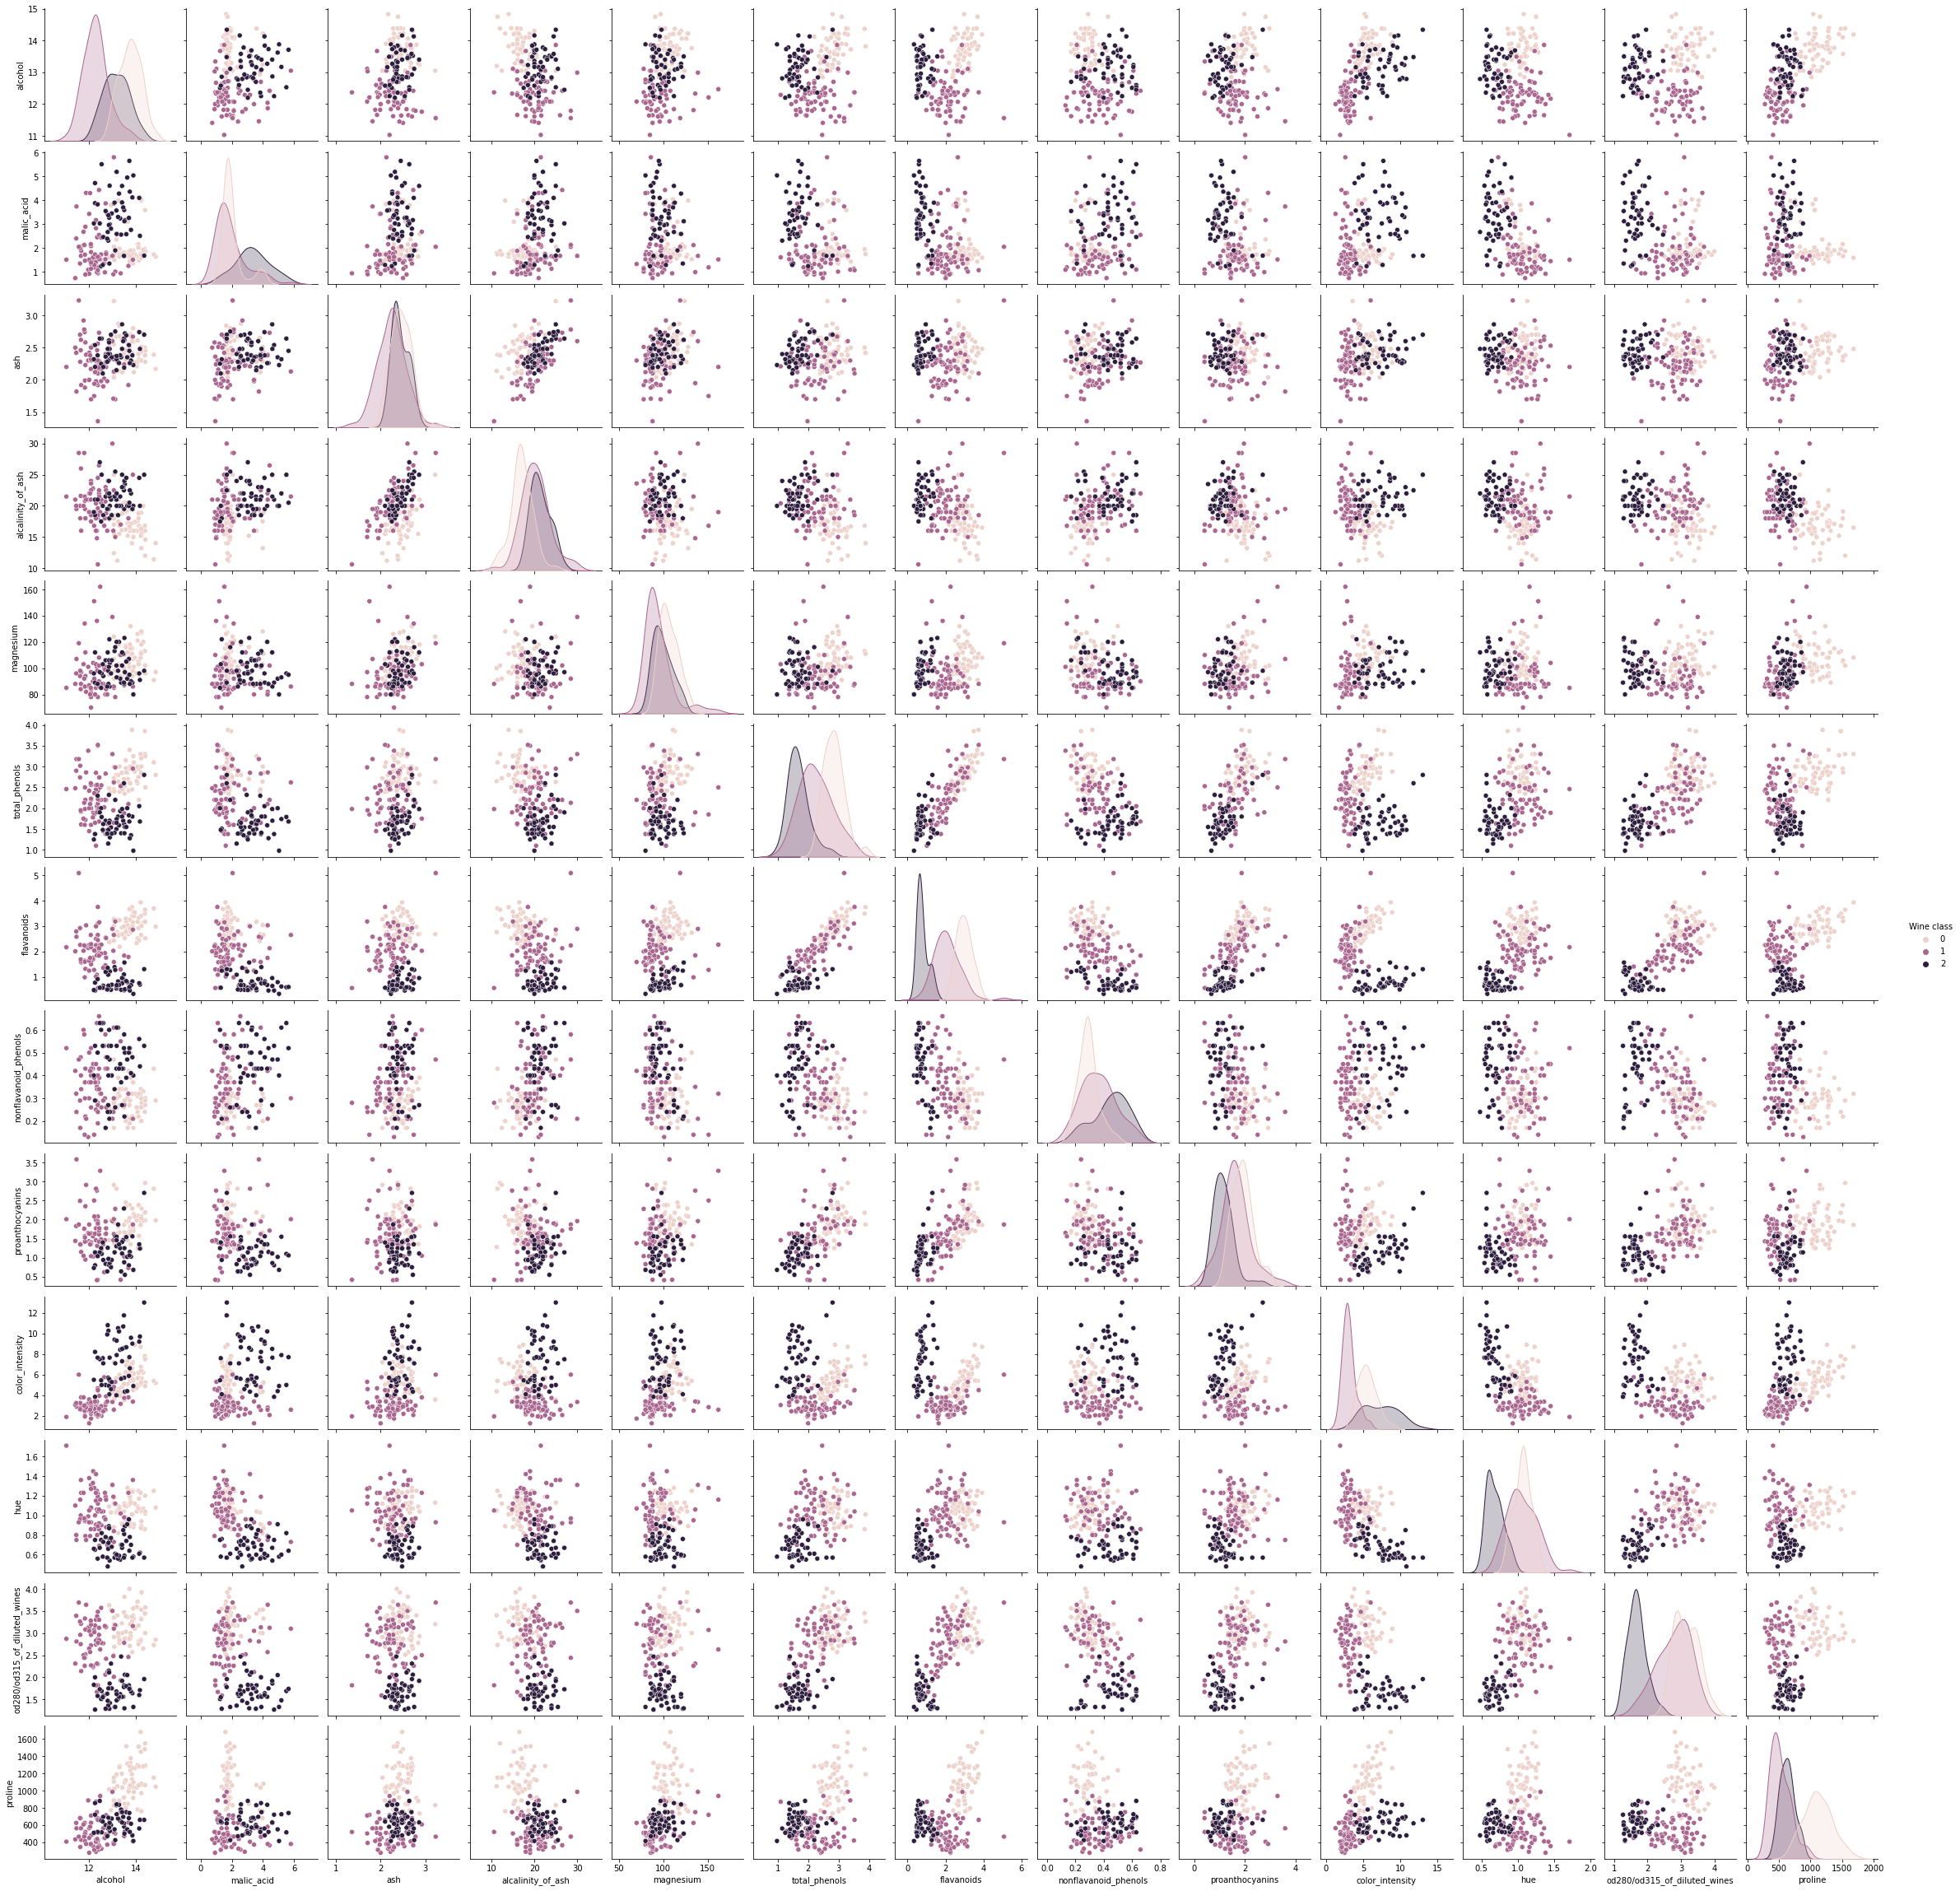

In [46]:
sns.pairplot(df, hue='Wine class')